## Loan Approval Predicion using Machine Learning

### What is a loan prediction system?
A mechanism called Loan Prediction System allows you to apply for loans and receive notifications when they are approved. By the data provided by the applicant, the system notifies the applicant of the loan's availability.

In [1]:
# importing various python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Reading the dataset from Excel file to dataframe 'df'
df= pd.read_excel('loan_ds.xlsx')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Information of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### <span style="color:red">Logging the required values</span>
#### Why do we log values ?
##### Loan amount distributions can often be right-skewed, meaning that there might be a few instances with very high loan amounts. Taking the logarithm can help in making the distribution more symmetric and can mitigate the impact of extreme values.



<AxesSubplot:>

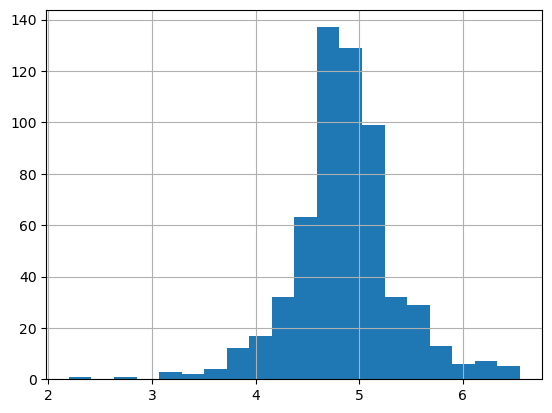

In [6]:
#Logging Loan_amount values and plotting histogram
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins = 20) #it means that you want to divide the range of your data into 20 intervals

<AxesSubplot:>

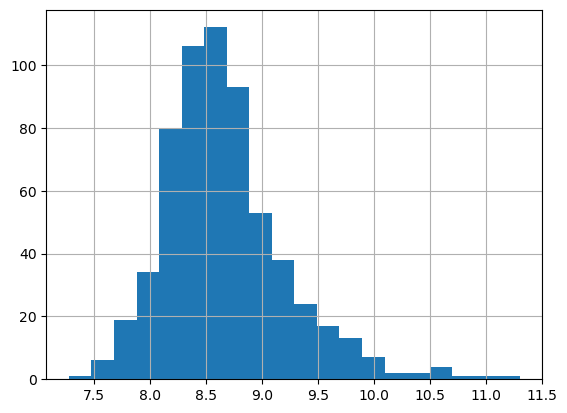

In [7]:
# Calculating Total Income
# Total Income = Applicant Income + Co Applicant Income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins = 20)

In [9]:
# Finding total sum of Null Values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [17]:
# Filling values into null values 
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['LoanAmount']=df.LoanAmount.fillna(df['LoanAmount'].mean())
df['LoanAmount_log']=df.LoanAmount_log.fillna(df['LoanAmount_log'].mean())

In [18]:
# CHecking for null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [19]:
# X and Y Values for Statistical model ML
# X is all input values require to find Y
# Our Target variable Y here is 'Loan status'
x = df.iloc[:, np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values

Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

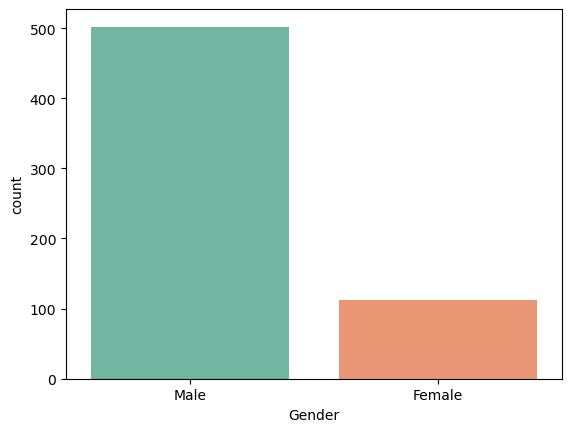

In [21]:
# Gender Plot
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df , palette = 'Set2')

Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

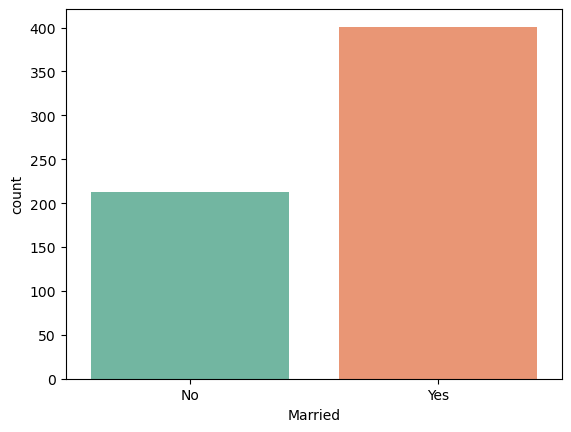

In [23]:
print(df['Married'].value_counts())
sns.countplot(x='Married' , data=df, palette='Set2')

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

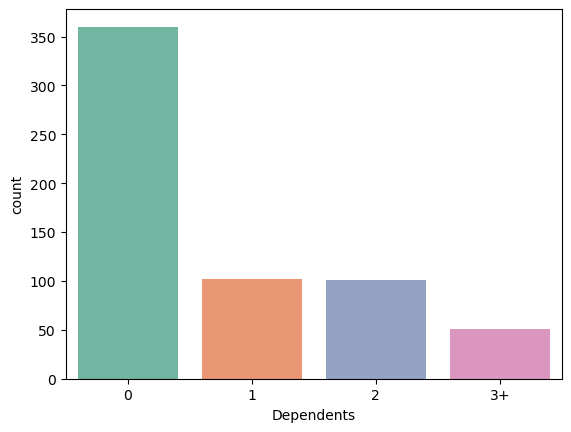

In [26]:
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents' , data =df , palette = 'Set2')

No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

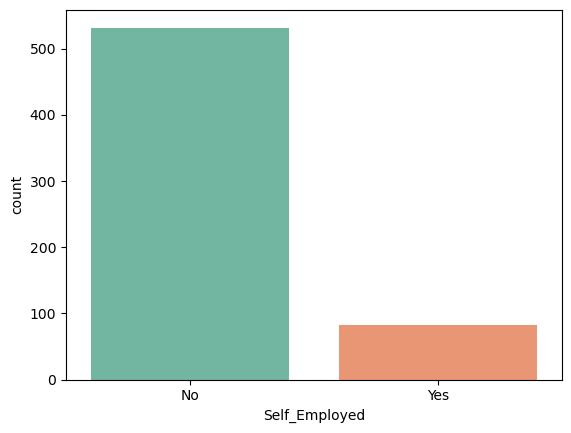

In [28]:
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed' , data=df, palette='Set2')

In [30]:
print(df['LoanAmount'].value_counts())

120.0    42
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64


1.0    525
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

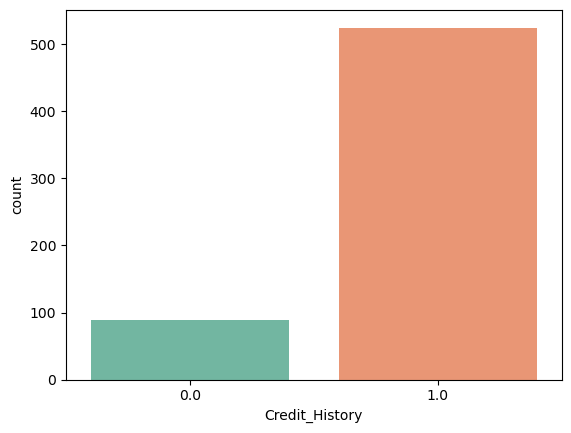

In [31]:
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History' , data =df , palette = 'Set2')

In [32]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size = 0.2 , random_state= 0)

from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()

##### <font color="red">NOTE:</font> The LabelEncoder accepts only the same type of input. Therefore, enter just similar type data before running LabelEncoder.

In [33]:
for i in range(0,5):
    X_train[:,i] = X_train[:,i].astype(str)
    X_train[:,i] = labelencoder_x.fit_transform(X_train[:,i]) 
    X_train[:,7] = labelencoder_x.fit_transform(X_train[:,7])
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [34]:
labelencoder_y = LabelEncoder()
Y_train = labelencoder_y.fit_transform(Y_train)
Y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [35]:
for i in range(0,5):
    X_test[:,i] = X_test[:,i].astype(str)
    X_test[:,i] = labelencoder_x.fit_transform(X_test[:,i])
    X_test[:,7] = labelencoder_x.fit_transform(X_test[:,7])
X_test

array([[1, 0, 0, 0, 4, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 4, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 4, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 4, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 4, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 2, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 2, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 4, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 4, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 4, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 4, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 4, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 4, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 4, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 4, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 4, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 4, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 4, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 4, 1.0, 4.532599493153256, 1],
       [1, 1

In [36]:
Y_test = labelencoder_y.fit_transform(Y_test)
Y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

#### Checking for Better Prediction System for Loan Approval
Classifiers

- RandomForestClassifier
-  GaussianNB
-  DecisionTreeClassifier
-  KNeighborsClassifier

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_cf = RandomForestClassifier()
rf_cf.fit(X_train, Y_train)
y_pred = rf_cf.predict(X_test)
print("Acc of random forest Classifier is ",metrics.accuracy_score(y_pred, Y_test))
y_pred

Acc of random forest Classifier is  0.7723577235772358


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [39]:
from sklearn.naive_bayes import GaussianNB
mb_clf = GaussianNB()
mb_clf.fit(X_train , Y_train)
y_pred2 = mb_clf.predict(X_test)
print("Acc of Naive Bayes is ",metrics.accuracy_score(y_pred2 , Y_test))
y_pred2

Acc of Naive Bayes is  0.8292682926829268


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)
y_pred3 = dt_clf.predict(X_test)
print("Acc of Naive Bayes is ",metrics.accuracy_score(y_pred3 , Y_test))
y_pred3

Acc of Naive Bayes is  0.7398373983739838


array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [41]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, Y_train)
y_pred4 = kn_clf.predict(X_test)
print("Acc of Naive Bayes is ",metrics.accuracy_score(y_pred4 , Y_test))
y_pred4

Acc of Naive Bayes is  0.7967479674796748


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

<font color='red'>Naive Bayes Prediction has higher Accuracy for Loan Prediciton<font>